Projeto 1 - Ciência dos Dados

Nome: Thalia Loiola Silva

# Pergunta a ser respondida:

* A taxa de empregabilidade de países que pertencem à Organização para a Cooperação e Desenvolvimento Econômico (OCDE) aumenta de acordo com uma educação primária qualificada?

# Explicação da hipótese:

   A Organização para Cooperação e Desenvolvimento Econômico - OCDE - como o próprio nome sugere, oferece um ambiente onde 36 países podem comparar experiências políticas, buscar respostas para problemas comuns, identificar boas práticas e coordenar políticas domésticas e internacionais. Nesse contexto, vale ressaltar que esses fatores são fontes de uma valiosa crescente na economia dos países que estão inseridos nesse meio. 
   
   De acordo com o site da OCDE, em inglês OECD, e com o site do Word Population, os 10 países reconhecidos com a melhor educação no mundo (dados coletados de 2018), pertencem à OCDE. Nesse contexto, nota-se que uma economia bem-sucedida é consideravelmente influenciada pelo nível de investimento em educação. Portanto, é razoável dizer que esses os países pertencentes à organização, após a entrada, tenham sofrido impactos no meio educacional.
   
   
   Fontes:
   
   Word Population: 
   http://worldpopulationreview.com/countries/education-rankings-by-country/
   
   OCDE: 
   https://www.oecd.org/about/members-and-partners/
           
   

# Países pertencentes à OCDE

A seguir, a lista de todos os países que compõem a OCDE e seus respectivos anos de entrada à organização:


* Austrália (1971)
* Áustria (1961)
* Bélgica (1961)
* Canadá (1961)
* Chile (2010)
* República Checa (1995)
* Dinamarca (1961)
* Estônia (2010)
* Finlândia (1969)
* França (1961)
* Alemanha (1995)
* Grécia (1961) 
* Hungria (1996)
* Islândia (1961)
* Irlanda (1961)
* Israel (2010)
* Itália (1961)
* Japão (1964)
* Coréia (1996)
* Letônia (2016)
* Lituânia (2018)
* Luxemburgo (1961)
* México (1994)
* Países baixos (1961) 
* Nova Zelândia
* Noruega (1961)
* Portugal (1961)
* República Eslovaca (2000)
* Eslovênia (2010)
* Espanha (1959)
* Suécia (1961)
* Suíça (1961)
* Turquia (1961)
* Reino Unido (1961)
* Estados Unidos (1961)





# Base de dados:



https://docs.google.com/spreadsheets/d/1Wus-UDcQDkxEkvAlUCccNoEBQBIeqUsb6pUJKsZQAAo/pub# : Porcentagem de conclusão da educação primária

https://docs.google.com/spreadsheets/d/1jsXSKnWgsXvjYyR-4R2b9VKGh22IM70C9WQg74xK8U8/pub : Porcentagem de empregados acima de 15 anos de idade.

https://www.oecd.org/about/members-and-partners/ : Países pertencentes à OCDE

        

# Análise dos dados:


Foram selecionados os dados referentes a porcentagem de pessoas que concluiram a educação primária nos 36 países que compõem a OCDE. Esses dados foram analisados desde 1971 à 2018, de acordo com a seguinte fonte: https://docs.google.com/spreadsheets/d/1Wus-UDcQDkxEkvAlUCccNoEBQBIeqUsb6pUJKsZQAAo/pub# ; 


Para relacionar os dados correspondentes a educação, analisou-se de que forma esses países se comportavam no quesito empregabilidade, uma vez que esse fator também auxilia no crescimento da economia. Para isso, foram coletados dados de empregados pertencentes a uma faixa etária acima de 15 anos, de 1991 à 2007.
Fonte: https://docs.google.com/spreadsheets/d/1jsXSKnWgsXvjYyR-4R2b9VKGh22IM70C9WQg74xK8U8/pub

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
educacao_primaria = "PrimaryCompletion.xlsx"
empregados = 'indicator_t above 15 employ - PAISES OCDE.xlsx'

dados_educ = pd.read_excel(educacao_primaria, sheet_name="Data", skiprows=3)
tabela_empregados = pd.read_excel(empregados, sheet_name="Data")

In [3]:
#Mudança do index:

educ_primaria = dados_educ.set_index("Country Name")
taxa_empregados = tabela_empregados.set_index("Total above 15 employment to population (%)")

In [4]:
#criar lista com os nomes dos paises pertencentes a OCDE:
sim_OCDE_educacao = ['Australia', 'Austria', 'Belgium','Canada',
            'Chile', 'Czech Republic', 'Estonia', 'Finland', 
            'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
            'Ireland', 'Israel', 'Italy', 'Japan', 'Korea, Rep.',
            'Latvia', 'Lithuania', 'Luxembourg', 'Mexico', 
            'Netherlands', 'New Zealand', 'Norway', 'Poland', 
            'Portugal', 'Slovak Republic', 'Slovenia', 'Spain', 
            'Sweden', 'Switzerland', 'Turkey', 'United Kingdom',
            'United States']

educ_primaria.loc[:,"OCDE"] = "não"
educ_primaria.loc[sim_OCDE_educacao, "OCDE"] = "sim"

In [5]:
educ_primaria.OCDE.value_counts()

não    229
sim     35
Name: OCDE, dtype: int64

In [6]:
sim_OCDE_empregados = ['Australia', 'Austria', 'Belgium','Canada',
            'Chile', 'Czech Rep.', 'Estonia', 'Finland', 
            'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
            'Ireland', 'Israel', 'Italy', 'Japan', 'Korea, Rep.',
            'Latvia', 'Lithuania', 'Luxembourg', 'Mexico', 
            'Netherlands', 'New Zealand', 'Norway', 'Poland', 
            'Portugal', 'Slovak Republic', 'Slovenia', 'Spain', 
            'Sweden', 'Switzerland', 'Turkey', 'United Kingdom',
            'United States']

taxa_empregados.loc[:,"OCDE"] = "não"
taxa_empregados.loc[sim_OCDE_empregados, "OCDE"] = "sim"

In [7]:
taxa_empregados.OCDE.value_counts()

não    143
sim     35
Name: OCDE, dtype: int64

In [8]:
#Pegar todos os países que pertencem a OCDE e analisa-los separadamente:

empregados_OCDE = taxa_empregados.loc[(taxa_empregados.OCDE == 'sim')]
educacao_OCDE = educ_primaria.loc[(educ_primaria.OCDE == 'sim'), 
                                     (1991, 1992, 1993, 1994, 1995, 1996,
                                     1997, 1998, 1999, 2000, 2001, 2002, 2003,
                                     2004, 2005, 2006, 2007)]

empregados_OCDE
educacao_OCDE

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
Country Name,,,,,,,,,,,,,,,,,
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.917717,100.874878,NaN,NaN,100.222198,NaN,98.744301,NaN,NaN,NaN
Belgium,79.334824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.151108,95.618668,97.303520,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Switzerland,53.627510,55.172932,61.180141,62.227299,NaN,72.855164,NaN,NaN,95.226646,96.278473,97.650627,97.885132,98.093102,99.059792,96.601059,93.587608,93.031998
Chile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Czech Republic,NaN,NaN,96.686157,103.843307,104.551491,108.631989,NaN,NaN,99.461861,99.344261,99.443977,104.011543,99.177528,99.777893,98.935730,93.896439,95.598938
Germany,NaN,NaN,100.044098,96.418747,95.881241,96.412239,98.558998,NaN,101.216827,104.121872,105.600082,101.509239,100.550903,99.363487,96.785149,98.405884,103.449219
Spain,NaN,NaN,100.732468,101.817101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.182541,NaN,96.604736,98.181953


# Escolha de um ano para análise



In [9]:
#escolha de um ano para analise
educacao_1996 = educ_primaria.loc[:,[1996]]
empregados_1996 = taxa_empregados.loc[:, [1996]]

In [10]:
empregados_1996.head()

,1996
Total above 15 employment to population (%),
Afghanistan,56.099998
Albania,52.599998
Algeria,38.900002
Angola,75.900002
Argentina,54.400002


In [11]:
educacao_1996.head()

,1996
Country Name,
Aruba,NaN
Afghanistan,NaN
Angola,NaN
Albania,92.024391
Andorra,NaN


In [12]:
df = educacao_1996.join(empregados_1996, how='inner', lsuffix='_educacao', rsuffix='_empregados')
df.head(7)

,1996_educacao,1996_empregados
Afghanistan,NaN,56.099998
Angola,NaN,75.900002
Albania,92.024391,52.599998
United Arab Emirates,84.853012,73.000000
Argentina,93.618874,54.400002
Armenia,NaN,38.099998
Australia,NaN,58.200001


AttributeError: 'DataFrame' object has no attribute 'educacao'

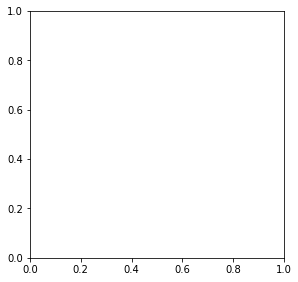

In [13]:
fig = plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.scatter(df.educacao, df.empregados, c='red', alpha=0.8)
plt.title('X3 versus X4')
plt.xlabel('% de população urbana')
plt.ylabel('Expectativa de vida Feminina')

In [ ]:
educ_primaria.boxplot(column=1996, by='OCDE')

In [ ]:
taxa_empregados.boxplot(column=1996, by='OCDE')

In [ ]:
taxa_empregados.hist(column=1996, by='OCDE')

In [ ]:
educ_primaria.hist(column=1996, by='OCDE')

In [ ]:
plt.scatter(educ_primaria.loc[educ_primaria.OCDE=="sim",1996], taxa_empregados.loc[taxa_empregados.OCDE=="sim", 1996], color="r")


In [ ]:
media_educ_primaria = educ_primaria.mean()
anos = media_educ_primaria.index

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(anos, media_educ_primaria)
plt.title('Taxa de conclusão do ensino primário ao longo dos anos')
plt.xlabel('Anos')
plt.ylabel('Taxa de conclusão do Ensino Primário')
plt.axis([1990, 2007, 74, 88])
plt.grid(True)

Nota-se, de acordo com o gráfico acima, que há uma crescente na taxa de crianças que concluiram o ensino primário quando se compara o intervalo de tempo entre o ano de 1991 e 2007.

In [ ]:
media_taxa_empregados = taxa_empregados.mean()
anos = media_taxa_empregados.index

In [14]:
plt.figure(figsize =(20,10))
plt.plot(anos, media_taxa_empregados)
plt.title('Taxa de empregabilidade ao longo dos anos')
plt.xlabel('Anos')
plt.ylabel('Taxa de empregabilidade acima dos 15 anos de idade')
plt.grid(True)

NameError: name 'anos' is not defined

<Figure size 1440x720 with 0 Axes>

Note que em ambos os gráficos, temos uma crescente na taxa de empregabilidade associada a uma crescente na taxa de conclusão do ensino médio, o que pode ser um indicador de que, de fato, faz sentido a correlação entre as variáveis qualitativas. Para ainda reforçar a hipotése, a seguir, tem-se um artigo divulgado em ... que ...:

In [ ]:
media_educ_OCDE = educacao_OCDE.mean()
anos = media_educ_OCDE.index

plt.figure(figsize=(20,10))
plt.plot(anos, media_educ_OCDE)
plt.title('Taxa de conclusão do ensino primário ao longo dos anos (Países da OCDE)')
plt.xlabel('Anos')
plt.ylabel('Taxa de conclusão do Ensino Primário')
plt.grid(True)

In [ ]:
media_taxa_empregados_OCDE = empregados_OCDE.mean()
anos = media_taxa_empregados_OCDE.index

plt.figure(figsize =(20,10))
plt.plot(anos, media_taxa_empregados_OCDE)
plt.title('Taxa de empregabilidade ao longo dos anos (Países da OCDE)')
plt.xlabel('Anos')
plt.ylabel('Taxa de empregabilidade acima dos 15 anos de idade')
plt.grid(True)

In [ ]:
educacao_anos = educacao_OCDE.loc[:,(1991, 1992, 1993, 1994, 1995, 1996,
                                     1997, 1998, 1999, 2000, 2001, 2002, 2003,
                                     2004, 2005, 2006, 2007)]

educ_primaria_transposta = educacao_anos.T
educ_primaria_transposta

In [ ]:
media_educacao = educacao_anos.mean()
plt.figure(figsize=(20,10))
for pais in educ_primaria_transposta.columns:
    plt.scatter(x=educ_primaria_transposta.index, y=educ_primaria_transposta[pais])
plt.plot(media_educacao.index, media_educacao, color = 'b')
plt.title('Taxa de conclusão do ensino primário ao longo dos anos (Países da OCDE)')
plt.xlabel('Anos')
plt.ylabel('Taxa de conclusão do Ensino Primário')
plt.grid(True)

In [ ]:
taxa_empregados.columns

In [ ]:
empregados_datas = [  1991,   1992,   1993,   1994,   1995,   1996,   1997,   1998,   1999,
         2000,   2001,   2002,   2003,   2004,   2005,   2006,   2007]

In [ ]:
empregados_anos = empregados_OCDE.loc[:, empregados_datas]

In [ ]:
empregados_anos_t = empregados_anos.T

In [ ]:
medias_empregados = empregados_anos.mean()
plt.figure(figsize=(20,10))
for pais in empregados_anos_t.columns:
    plt.scatter(x=empregados_anos_t.index, y=empregados_anos_t[pais])
plt.plot(medias_empregados.index,  medias_empregados, color="r")
plt.title('Taxa de empregabilidade ao longo dos anos (Países da OCDE)')
plt.xlabel('Anos')
plt.ylabel('Taxa de empregabilidade acima dos 15 anos de idade')
plt.grid(True)

In [ ]:
reta(energia.loc[energia.Europa=="sim","2000"], telefonia.loc[telefonia.Europa=="sim", "2000"], "r")
plt.scatter(energia.loc[energia.Europa=="não","2000"], telefonia.loc[telefonia.Europa=="não", "2000"], color="b")
reta(energia.loc[energia.Europa=="não","2000"], telefonia.loc[telefonia.Europa=="não", "2000"], "g")